In [1]:
import pandas as pd
import numpy as np
import nltk
import spacy

import matplotlib.pyplot as plt


%matplotlib inline

In [2]:
df = pd.read_csv("Womens Clothing E-Commerce Reviews.csv")
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
Unnamed: 0                 23486 non-null int64
Clothing ID                23486 non-null int64
Age                        23486 non-null int64
Title                      19676 non-null object
Review Text                22641 non-null object
Rating                     23486 non-null int64
Recommended IND            23486 non-null int64
Positive Feedback Count    23486 non-null int64
Division Name              23472 non-null object
Department Name            23472 non-null object
Class Name                 23472 non-null object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [4]:
df.describe()

,Unnamed: 0,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,11742.500000,918.118709,43.198544,4.196032,0.822362,2.535936
std,6779.968547,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,0.000000,18.000000,1.000000,0.000000,0.000000
25%,5871.250000,861.000000,34.000000,4.000000,1.000000,0.000000
50%,11742.500000,936.000000,41.000000,5.000000,1.000000,1.000000
75%,17613.750000,1078.000000,52.000000,5.000000,1.000000,3.000000
max,23485.000000,1205.000000,99.000000,5.000000,1.000000,122.000000


In [5]:
df = df[['Review Text','Rating']]
df.head()

,Review Text,Rating
0,Absolutely wonderful - silky and sexy and comf...,4
1,Love this dress! it's sooo pretty. i happene...,5
2,I had such high hopes for this dress and reall...,3
3,"I love, love, love this jumpsuit. it's fun, fl...",5
4,This shirt is very flattering to all due to th...,5


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 2 columns):
Review Text    22641 non-null object
Rating         23486 non-null int64
dtypes: int64(1), object(1)
memory usage: 367.0+ KB


In [7]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22641 entries, 0 to 23485
Data columns (total 2 columns):
Review Text    22641 non-null object
Rating         22641 non-null int64
dtypes: int64(1), object(1)
memory usage: 530.6+ KB


In [8]:
def remove_blanks(data):
    blanks = []  
    for i,lb,rv in data.itertuples():
        if type(rv)==str:            
            if rv.isspace():        
                blanks.append(i)     
            
    print(len(blanks), 'blanks: ', blanks)
    data.drop(blanks, inplace=True)
    print(data.shape)
    return data

df = remove_blanks(df)

0 blanks:  []
(22641, 2)


In [9]:
df['Rating'].value_counts()

5    12540
4     4908
3     2823
2     1549
1      821
Name: Rating, dtype: int64

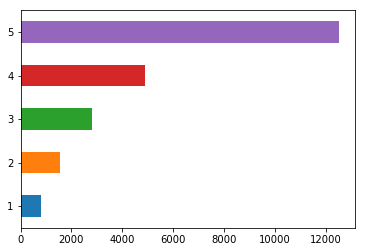

In [10]:
df['Rating'].value_counts().sort_values().plot(kind = 'barh')

In [11]:
from sklearn.model_selection import train_test_split
X = df['Review Text']
y = df['Rating']

x_train,x_test,y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=23)
print(f"train features sample size = {x_train.shape}")
print(f"train labels sample size = {y_train.shape}")
print(f"test features sample size = {x_test.shape}")
print(f"test features sample size = {y_test.shape}")

train features sample size = (15169,)
train labels sample size = (15169,)
test features sample size = (7472,)
test features sample size = (7472,)


In [12]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

In [13]:
text_clf_nb = Pipeline([('tfidf', TfidfVectorizer()),
                        ('clf', MultinomialNB())
])

text_clf_scv = Pipeline([('tfidf', TfidfVectorizer()),
                        ('clf', LinearSVC())
])

In [14]:
text_clf_nb.fit(x_train, y_train)

Pipeline(memory=None,
     steps=[('tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,...rue,
        vocabulary=None)), ('clf', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [15]:
predictions = text_clf_nb.predict(x_test)

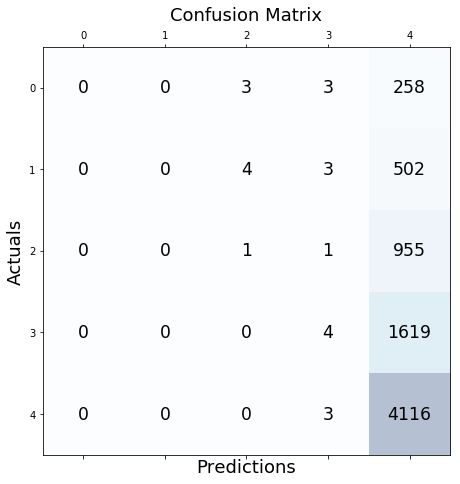

In [16]:
from sklearn import metrics
import seaborn as sn
cf = metrics.confusion_matrix(y_test, predictions)

def show_confusion_matrix(cf):

    fig, ax = plt.subplots(figsize=(7.5, 7.5))
    ax.matshow(cf, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(cf.shape[0]):
        for j in range(cf.shape[1]):
            ax.text(x=j, y=i,s=cf[i, j], va='center', ha='center', size='xx-large')
    
    plt.xlabel('Predictions', fontsize=18)
    plt.ylabel('Actuals', fontsize=18)
    plt.title('Confusion Matrix', fontsize=18)
    plt.show()

show_confusion_matrix(cf)

In [17]:
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       264
           2       0.00      0.00      0.00       509
           3       0.12      0.00      0.00       957
           4       0.29      0.00      0.00      1623
           5       0.55      1.00      0.71      4119

   micro avg       0.55      0.55      0.55      7472
   macro avg       0.19      0.20      0.14      7472
weighted avg       0.38      0.55      0.39      7472



c:\Anaconda3\envs\nlp_course\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [18]:
text_clf_scv.fit(x_train, y_train)

Pipeline(memory=None,
     steps=[('tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,...ax_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))])

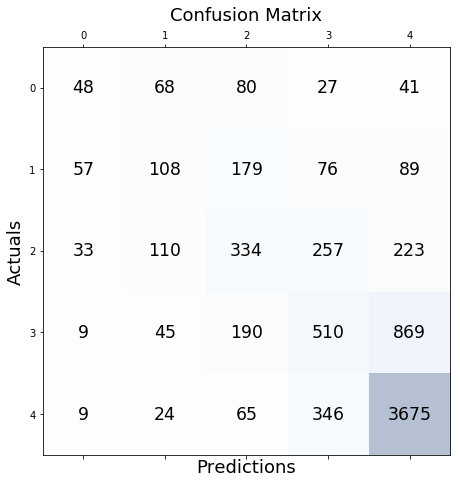

In [19]:
svc_predictions = text_clf_scv.predict(x_test)
svc_cf = metrics.confusion_matrix(y_test, svc_predictions)
show_confusion_matrix(svc_cf)

In [20]:
print(metrics.classification_report(y_test, svc_predictions))

              precision    recall  f1-score   support

           1       0.31      0.18      0.23       264
           2       0.30      0.21      0.25       509
           3       0.39      0.35      0.37       957
           4       0.42      0.31      0.36      1623
           5       0.75      0.89      0.82      4119

   micro avg       0.63      0.63      0.63      7472
   macro avg       0.44      0.39      0.40      7472
weighted avg       0.59      0.63      0.60      7472



## FUNDAMENTAL EDA TECHNICS

In [22]:
import nltk
from nltk.tokenize import sent_tokenize

#Character counts
df['char_count'] = df['Review Text'].map(lambda x: len(x))

#Word Counts
df['word_count'] = df['Review Text'].map(lambda x: len(x.split()))

#Sentence count
df['sentence_count'] = df['Review Text'].map(lambda x: len(sent_tokenize(x)))

# String count
df['hashtag_counts'] = df['Review Text'].map(lambda x: x.count('#'))

# Average word length
df['average_word_length'] = df['Review Text'].map(lambda x: np.mean([len(w) for w in str(x).split()]))

#Average sentence length
df['average_sentence_length'] = df['Review Text'].map(lambda x: np.mean([len(w.split()) for w in sent_tokenize(x)]))

In [26]:
df.head()


,Review Text,Rating,char_count,word_count,sentence_count,hashtag_counts,average_word_length,average_sentence_length
0,Absolutely wonderful - silky and sexy and comf...,4,53,8,1,0,5.750000,8.000000
1,Love this dress! it's sooo pretty. i happene...,5,303,62,6,0,3.822581,10.333333
2,I had such high hopes for this dress and reall...,3,500,98,5,0,4.112245,19.600000
3,"I love, love, love this jumpsuit. it's fun, fl...",5,124,22,3,0,4.681818,7.333333
4,This shirt is very flattering to all due to th...,5,192,36,4,0,4.361111,9.250000


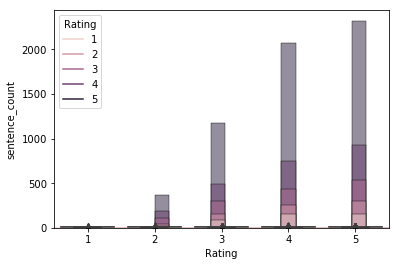

In [27]:
import seaborn as sns

# Histogram
sns.histplot(data = df, x = df['sentence_count'], hue = 'Rating')

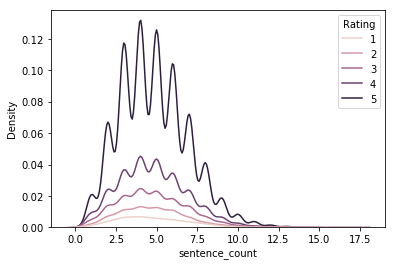

In [29]:
# KDE plot
sns.kdeplot(data = df, x = df['sentence_count'], hue = 'Rating')

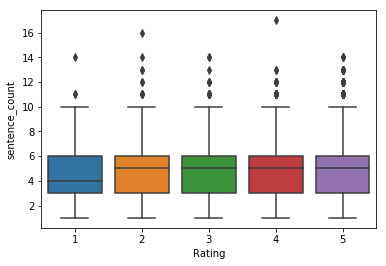

In [30]:
# Boxplot
sns.boxplot(data = df, x = 'Rating', y = df['sentence_count'])

### Term Frequency Analysis

In [33]:
import re
import string

def clean_text(text):
    #Convert text to lowercase
    text = text.lower()

    #Remove Punctuation
    text = re.sub("[%s]" % re.escape(string.punctuation), "", text)

    text = re.sub("([^\x00-\x7F])+", " ", text)

    return text

df['text_clean'] = df["Review Text"].apply(clean_text)
#df['text_clean'] = df["Review Text"].map(lambda x: clean_text(x))

df.head()

,Review Text,Rating,char_count,word_count,sentence_count,hashtag_counts,average_word_length,average_sentence_length,text_clean
0,Absolutely wonderful - silky and sexy and comf...,4,53,8,1,0,5.750000,8.000000,absolutely wonderful silky and sexy and comfo...
1,Love this dress! it's sooo pretty. i happene...,5,303,62,6,0,3.822581,10.333333,love this dress its sooo pretty i happened t...
2,I had such high hopes for this dress and reall...,3,500,98,5,0,4.112245,19.600000,i had such high hopes for this dress and reall...
3,"I love, love, love this jumpsuit. it's fun, fl...",5,124,22,3,0,4.681818,7.333333,i love love love this jumpsuit its fun flirty ...
4,This shirt is very flattering to all due to th...,5,192,36,4,0,4.361111,9.250000,this shirt is very flattering to all due to th...


In [35]:
from nltk.corpus import stopwords

stop = set(stopwords.words('english'))
corpus = [word for i in df["text_clean"].str.split().values.tolist() for word in i if (word not in stop)]
corpus

['absolutely',
 'wonderful',
 'silky',
 'sexy',
 'comfortable',
 'love',
 'dress',
 'sooo',
 'pretty',
 'happened',
 'find',
 'store',
 'im',
 'glad',
 'bc',
 'never',
 'would',
 'ordered',
 'online',
 'bc',
 'petite',
 'bought',
 'petite',
 '58',
 'love',
 'length',
 'hits',
 'little',
 'knee',
 'would',
 'definitely',
 'true',
 'midi',
 'someone',
 'truly',
 'petite',
 'high',
 'hopes',
 'dress',
 'really',
 'wanted',
 'work',
 'initially',
 'ordered',
 'petite',
 'small',
 'usual',
 'size',
 'found',
 'outrageously',
 'small',
 'small',
 'fact',
 'could',
 'zip',
 'reordered',
 'petite',
 'medium',
 'ok',
 'overall',
 'top',
 'half',
 'comfortable',
 'fit',
 'nicely',
 'bottom',
 'half',
 'tight',
 'layer',
 'several',
 'somewhat',
 'cheap',
 'net',
 'layers',
 'imo',
 'major',
 'design',
 'flaw',
 'net',
 'layer',
 'sewn',
 'directly',
 'zipper',
 'c',
 'love',
 'love',
 'love',
 'jumpsuit',
 'fun',
 'flirty',
 'fabulous',
 'every',
 'time',
 'wear',
 'get',
 'nothing',
 'great',
 

In [37]:
from nltk.probability import FreqDist
most_common = FreqDist(corpus).most_common(10)
most_common

[('dress', 10460),
 ('love', 8916),
 ('size', 8687),
 ('top', 7323),
 ('fit', 7238),
 ('like', 6992),
 ('wear', 6414),
 ('great', 6076),
 ('im', 5974),
 ('would', 5010)]

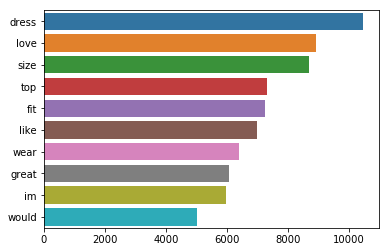

In [38]:
words, frequency = [],[]
for word, count in most_common:
    words.append(word)
    frequency.append(count)

sns.barplot(x=frequency, y=words)

In [39]:
from sklearn.feature_extraction.text import CountVectorizer
# Initialize CountVectorizer
vec = CountVectorizer(stop_words = stop, ngram_range = (2, 2))
# Matrix of ngrams
bow = vec.fit_transform(df["text_clean"])
# Count frequency of ngrams
count_values = bow.toarray().sum(axis=0)
# Create DataFrame from ngram frequencies
ngram_freq = pd.DataFrame(sorted([(count_values[i], k) for k, i in vec.vocabulary_.items()], reverse = True))
ngram_freq.columns = ["frequency", "ngram"]
ngram_freq

,frequency,ngram
0,1298,true size
1,720,love dress
2,686,usually wear
3,618,looks great
4,598,fit perfectly
5,538,love top
6,511,well made
7,509,size small
8,478,usual size
9,478,fits perfectly
